In [1]:
!pip install rdkit

In [2]:
import pandas as pd
from rdkit import Chem
from tqdm.auto import tqdm
from rdkit.Chem.Draw import MolsToGridImage
import seaborn as sns
from rdkit.Chem import Descriptors
from rdkit.ML.Descriptors.MoleculeDescriptors import MolecularDescriptorCalculator
import matplotlib.pyplot as plt

In [3]:
# Reading Training Set
dfTrain = pd.read_csv("training_data.csv")
dfTest = pd.read_csv("test_data.csv")
#dfTrain.head()
#dfTest.head()

In [4]:
# Calculating Descriptors
smiles_stringsTrain = dfTrain['SMILES'].tolist()
smiles_stringsTest = dfTest['SMILES'].tolist()
smiles_listTrain = []
smiles_listTest = []
for i in range(0, len(smiles_stringsTrain)):
  smiles_listTrain.append(Chem.MolFromSmiles(smiles_stringsTrain[i]))
for i in range(0, len(smiles_stringsTest)):
  smiles_listTest.append(Chem.MolFromSmiles(smiles_stringsTest[i]))
chosen_descriptors = ['MolWt', 'MolLogP', 'NumRotatableBonds', 'NumHAcceptors', 'NumHDonors']
mol_descriptor_calculator = MolecularDescriptorCalculator(chosen_descriptors)
descrsTrain = [mol_descriptor_calculator.CalcDescriptors(mol) for mol in smiles_listTrain]
descrsTest = [mol_descriptor_calculator.CalcDescriptors(mol) for mol in smiles_listTest]
df2Train = pd.DataFrame(descrsTrain)
df2Test = pd.DataFrame(descrsTest)

In [5]:
# Appending Descriptors to Existing Dataframes
for i in range(0, len(chosen_descriptors)):
    curName = chosen_descriptors[i]
    dfTrain[curName] = df2Train[i].tolist() 
    dfTest[curName] = df2Test[i].tolist()
dfTrain.head()

# Also Finding Values Following Lipinski Rules
def lipinski(df):
    return df[(df.NumHDonors <= 5) & (df.NumHAcceptors <= 10) & (df.MolWt <= 500) & (df.MolLogP <= 5)]
df3Train = lipinski(dfTrain)
df3Test = lipinski(dfTest)

In [6]:
# Analyzing Statistics of Dataframes
print("Training Set Statistics:")
print(dfTrain.describe())
print("")
print("Test Set Statistics:")
print(dfTest.describe())

Training Set Statistics:
             pIC50        MolWt      MolLogP  NumRotatableBonds  \
count  4724.000000  4724.000000  4724.000000        4724.000000   
mean      6.150318   436.439611     4.343615           6.882303   
std       1.306678   122.338565     2.301972           4.696113   
min       4.000000   144.238000    -6.143900           0.000000   
25%       5.130000   352.428000     3.078515           4.000000   
50%       5.960000   419.131000     4.297260           6.000000   
75%       7.010000   508.670750     5.603725           9.000000   
max      10.960000  1235.463000    13.506800          33.000000   

       NumHAcceptors   NumHDonors  
count    4724.000000  4724.000000  
mean        4.611135     1.184378  
std         1.981636     1.134265  
min         0.000000     0.000000  
25%         3.000000     0.000000  
50%         4.000000     1.000000  
75%         6.000000     2.000000  
max        22.000000    13.000000  

Test Set Statistics:
           pIC50       Mo

### Distribution of pIC50 Values - Test Set

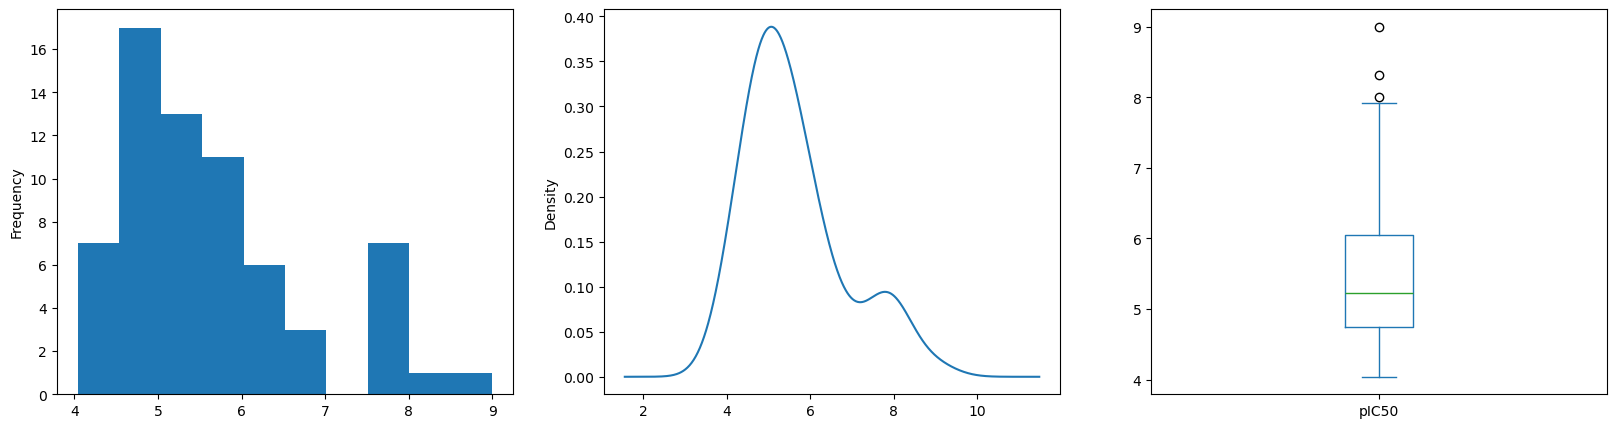

In [20]:
fig,ax = plt.subplots(1,3,figsize=(20,5))
dfTest['pIC50'].plot(kind="hist",ax=ax[0])
dfTest['pIC50'].plot(kind="kde",ax=ax[1])
dfTest['pIC50'].plot(kind="box",ax=ax[2])
plt.show()

### Distribution of pIC50 Values - Train Set

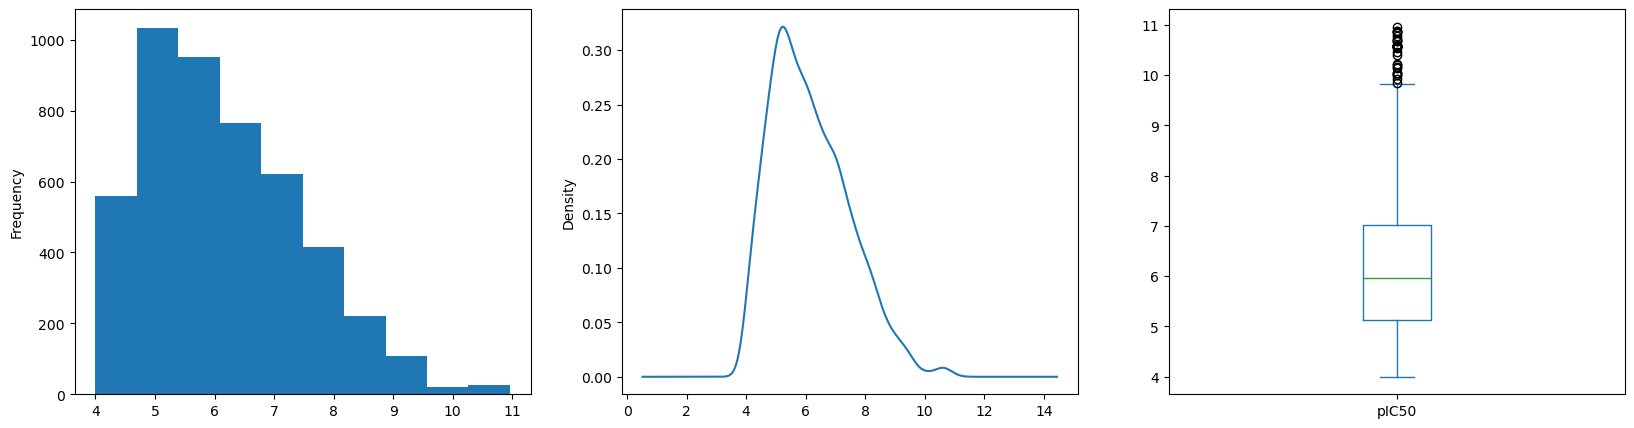

In [21]:
fig,ax = plt.subplots(1,3,figsize=(20,5))
dfTrain['pIC50'].plot(kind="hist",ax=ax[0])
dfTrain['pIC50'].plot(kind="kde",ax=ax[1])
dfTrain['pIC50'].plot(kind="box",ax=ax[2])
plt.show()

### Distribution of Molecular Weight - Test Set

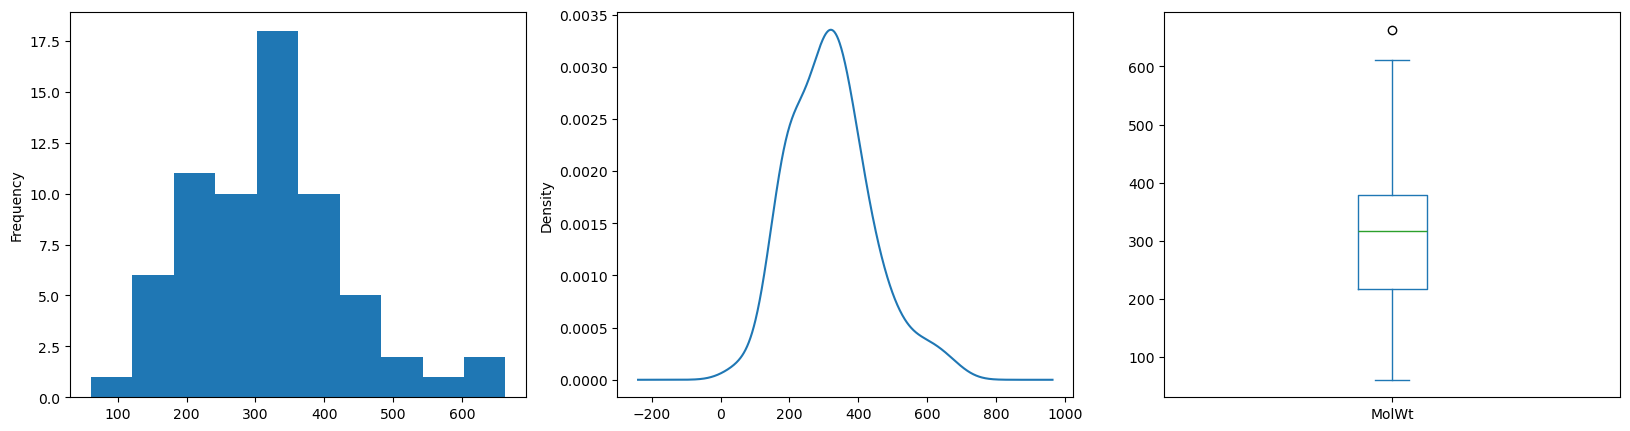

In [22]:
fig,ax = plt.subplots(1,3,figsize=(20,5))
dfTest['MolWt'].plot(kind="hist",ax=ax[0])
dfTest['MolWt'].plot(kind="kde",ax=ax[1])
dfTest['MolWt'].plot(kind="box",ax=ax[2])
plt.show()

### Distribution of Molecular Weight - Train Set

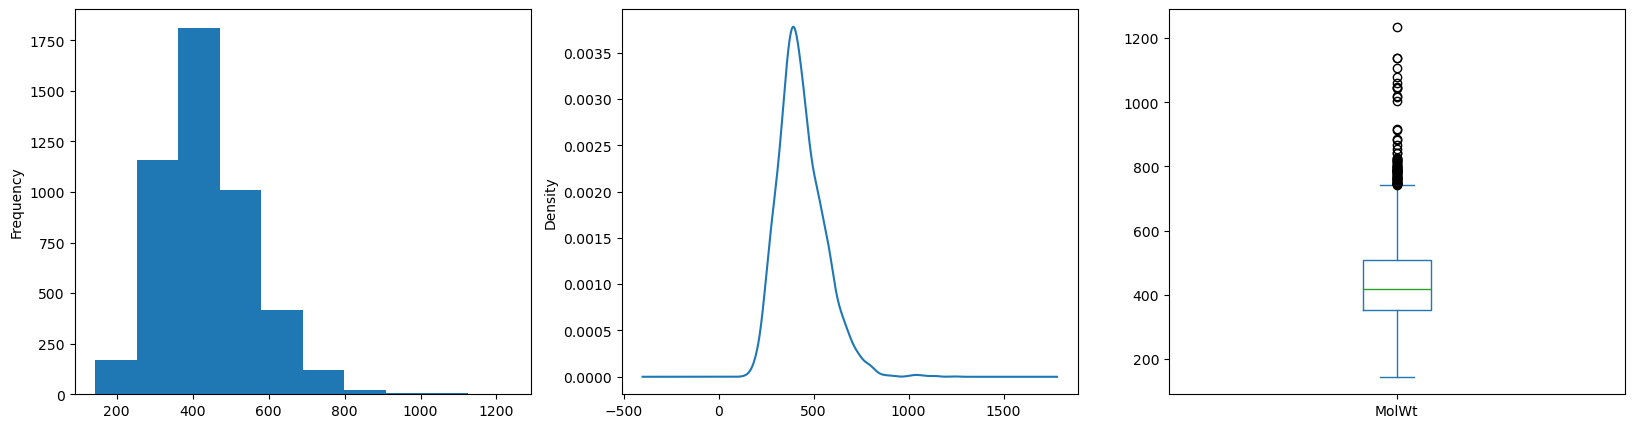

In [23]:
fig,ax = plt.subplots(1,3,figsize=(20,5))
dfTrain['MolWt'].plot(kind="hist",ax=ax[0])
dfTrain['MolWt'].plot(kind="kde",ax=ax[1])
dfTrain['MolWt'].plot(kind="box",ax=ax[2])
plt.show()

### Distribution of LogP - Test Set

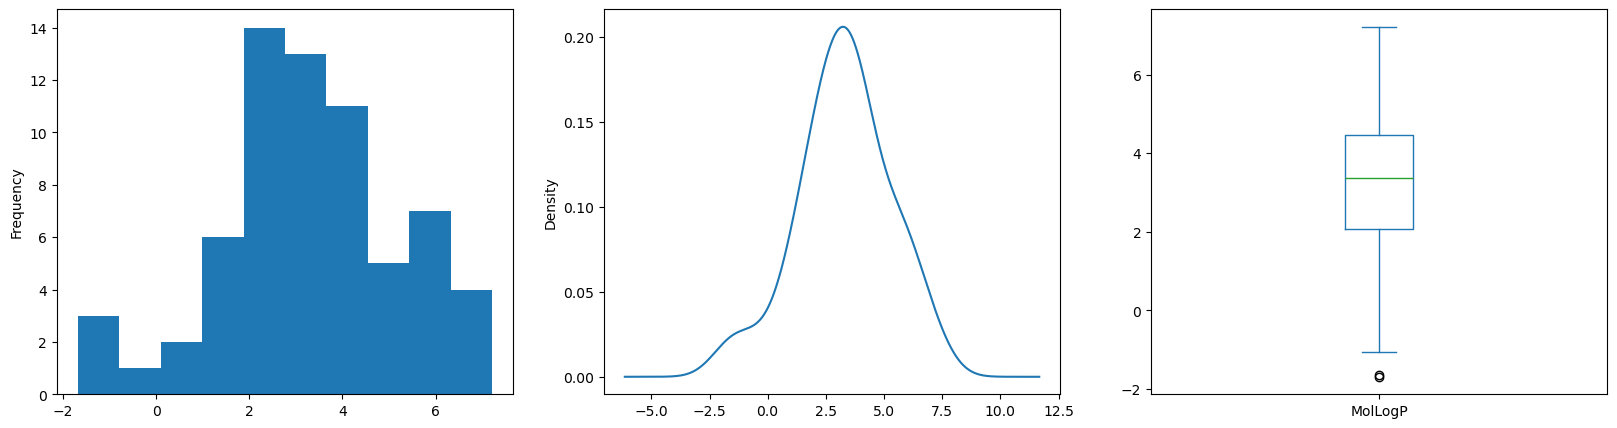

In [24]:
fig,ax = plt.subplots(1,3,figsize=(20,5))
dfTest['MolLogP'].plot(kind="hist",ax=ax[0])
dfTest['MolLogP'].plot(kind="kde",ax=ax[1])
dfTest['MolLogP'].plot(kind="box",ax=ax[2])
plt.show()

### Distribution of LogP - Train Set

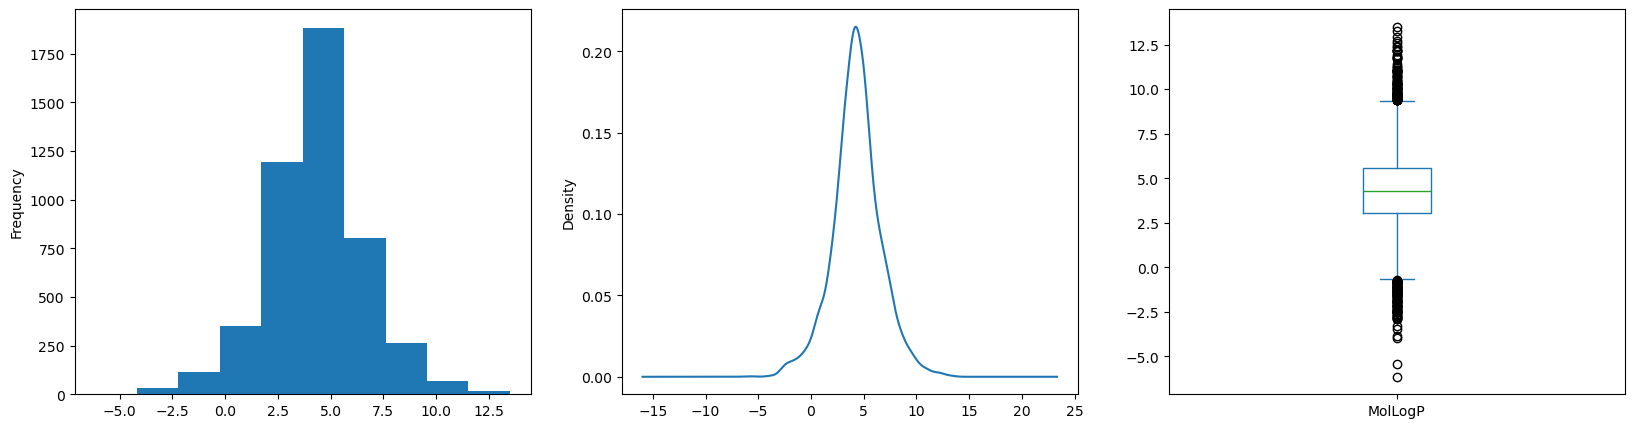

In [25]:
fig,ax = plt.subplots(1,3,figsize=(20,5))
dfTrain['MolLogP'].plot(kind="hist",ax=ax[0])
dfTrain['MolLogP'].plot(kind="kde",ax=ax[1])
dfTrain['MolLogP'].plot(kind="box",ax=ax[2])
plt.show()

### Distribution of Number of Rotatable Bonds - Test Set

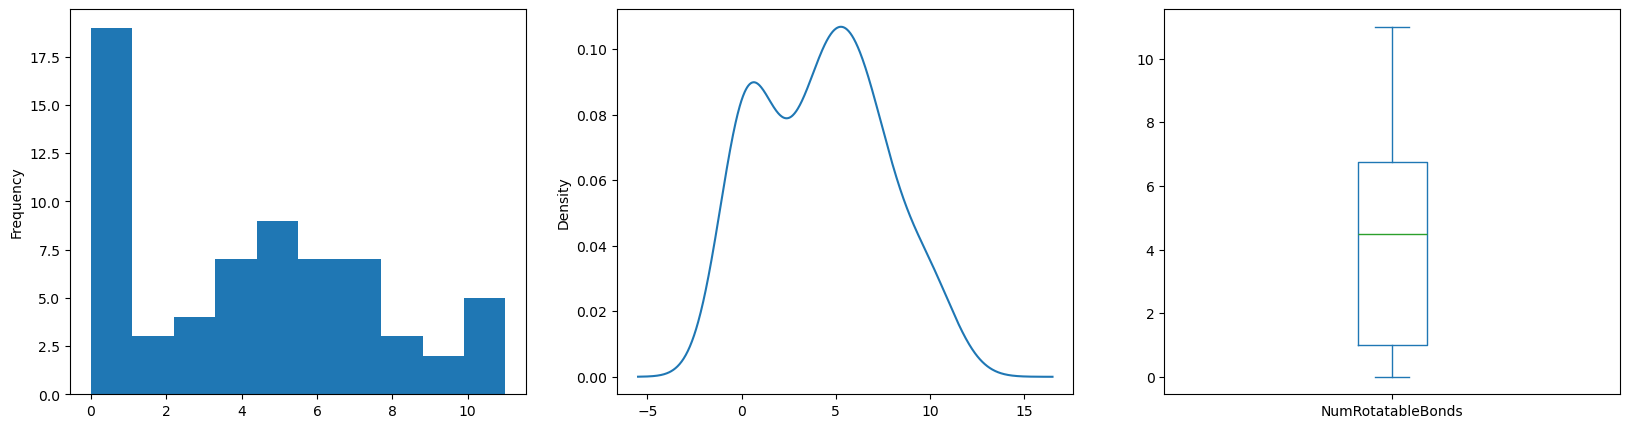

In [26]:
fig,ax = plt.subplots(1,3,figsize=(20,5))
dfTest['NumRotatableBonds'].plot(kind="hist",ax=ax[0])
dfTest['NumRotatableBonds'].plot(kind="kde",ax=ax[1])
dfTest['NumRotatableBonds'].plot(kind="box",ax=ax[2])
plt.show()

### Distribution of Number of Rotatable Bonds - Train Set

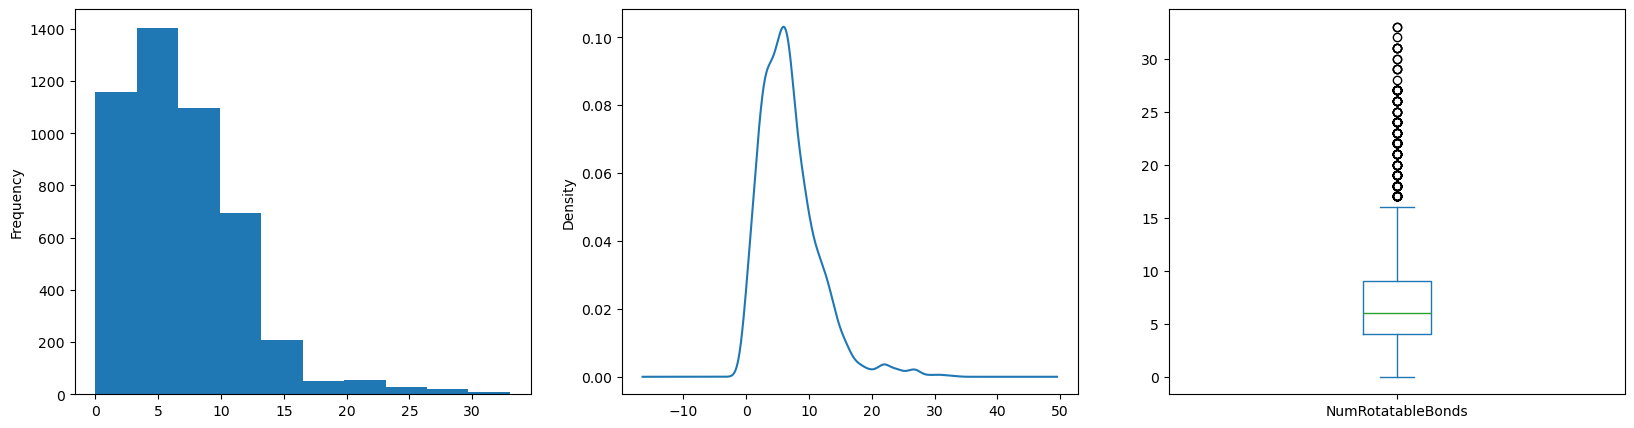

In [27]:
fig,ax = plt.subplots(1,3,figsize=(20,5))
dfTrain['NumRotatableBonds'].plot(kind="hist",ax=ax[0])
dfTrain['NumRotatableBonds'].plot(kind="kde",ax=ax[1])
dfTrain['NumRotatableBonds'].plot(kind="box",ax=ax[2])
plt.show()

### Distribution of Number of H Acceptors - Test Set

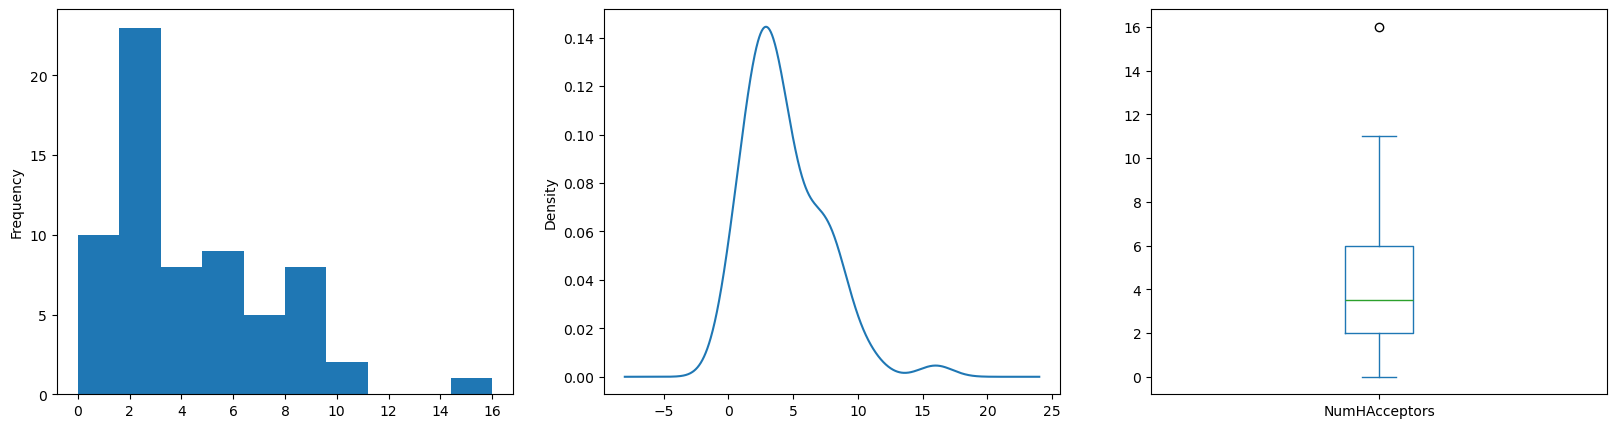

In [28]:
fig,ax = plt.subplots(1,3,figsize=(20,5))
dfTest['NumHAcceptors'].plot(kind="hist",ax=ax[0])
dfTest['NumHAcceptors'].plot(kind="kde",ax=ax[1])
dfTest['NumHAcceptors'].plot(kind="box",ax=ax[2])
plt.show()

### Distribution of Number of H Acceptors - Train Set

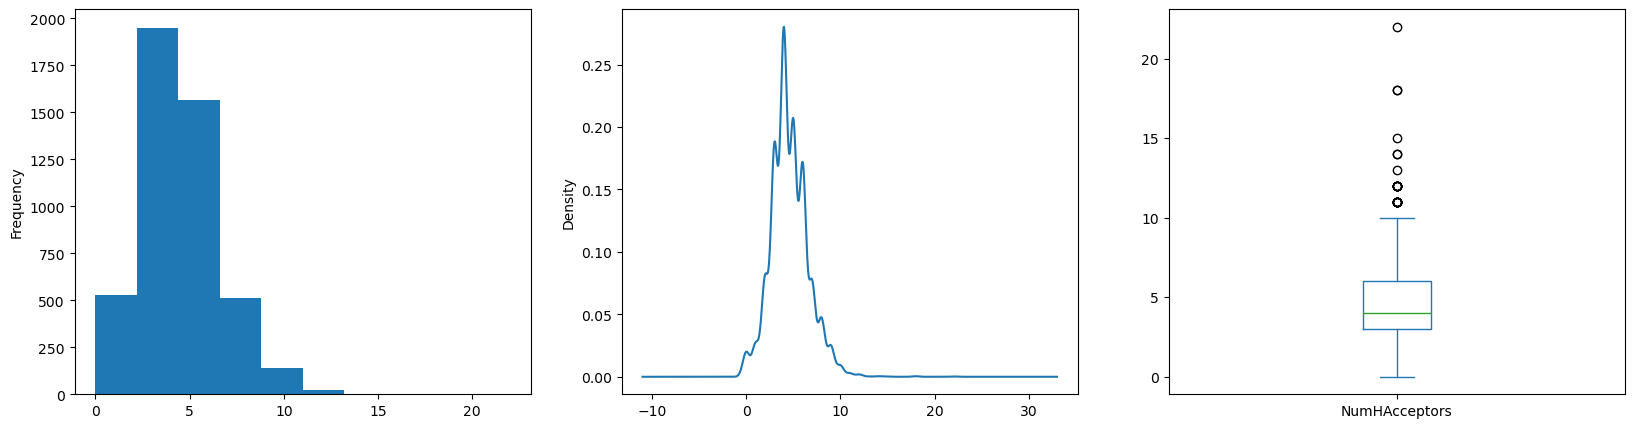

In [29]:
fig,ax = plt.subplots(1,3,figsize=(20,5))
dfTrain['NumHAcceptors'].plot(kind="hist",ax=ax[0])
dfTrain['NumHAcceptors'].plot(kind="kde",ax=ax[1])
dfTrain['NumHAcceptors'].plot(kind="box",ax=ax[2])
plt.show()

### Distribution of Number of H Donors - Test Set

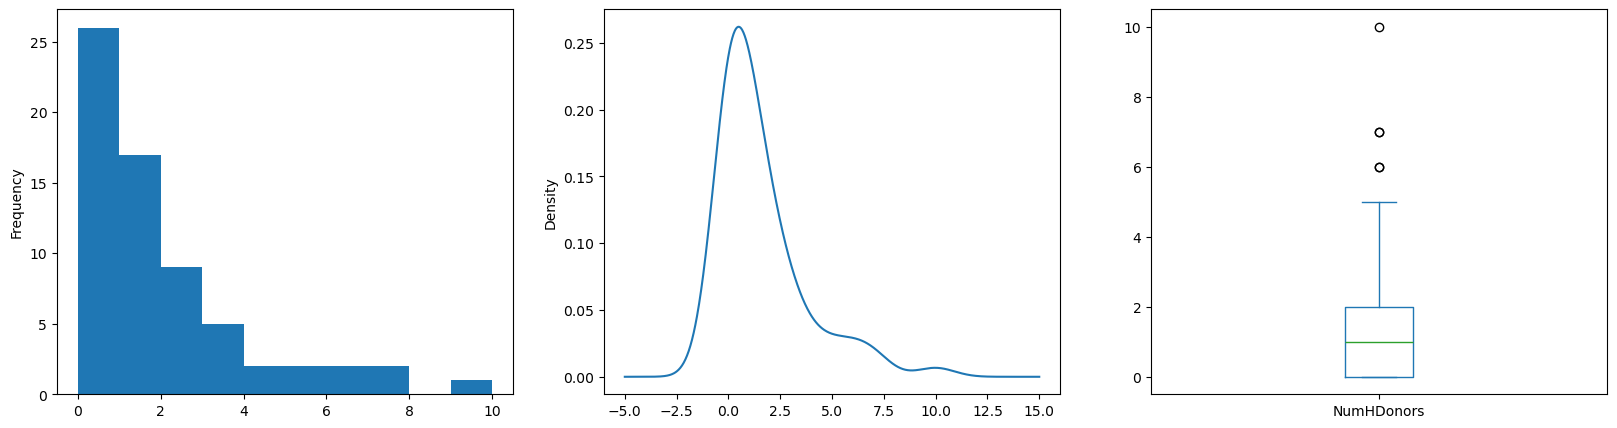

In [30]:
fig,ax = plt.subplots(1,3,figsize=(20,5))
dfTest['NumHDonors'].plot(kind="hist",ax=ax[0])
dfTest['NumHDonors'].plot(kind="kde",ax=ax[1])
dfTest['NumHDonors'].plot(kind="box",ax=ax[2])
plt.show()

### Distribution of Number of H Donors - Train Set

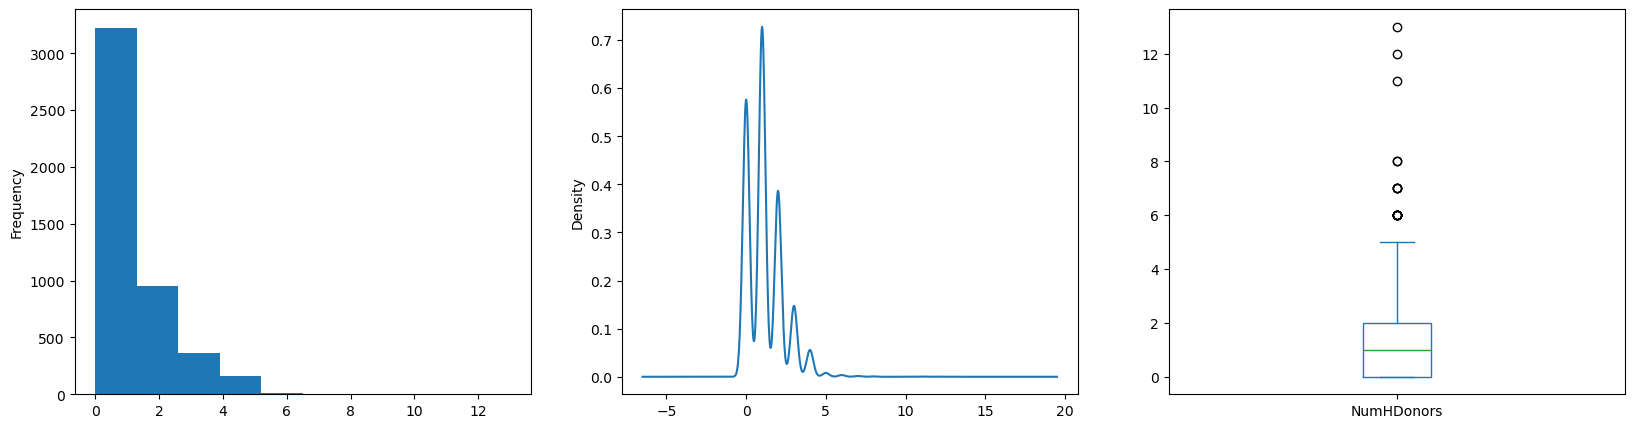

In [31]:
fig,ax = plt.subplots(1,3,figsize=(20,5))
dfTrain['NumHDonors'].plot(kind="hist",ax=ax[0])
dfTrain['NumHDonors'].plot(kind="kde",ax=ax[1])
dfTrain['NumHDonors'].plot(kind="box",ax=ax[2])
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


<Axes: >

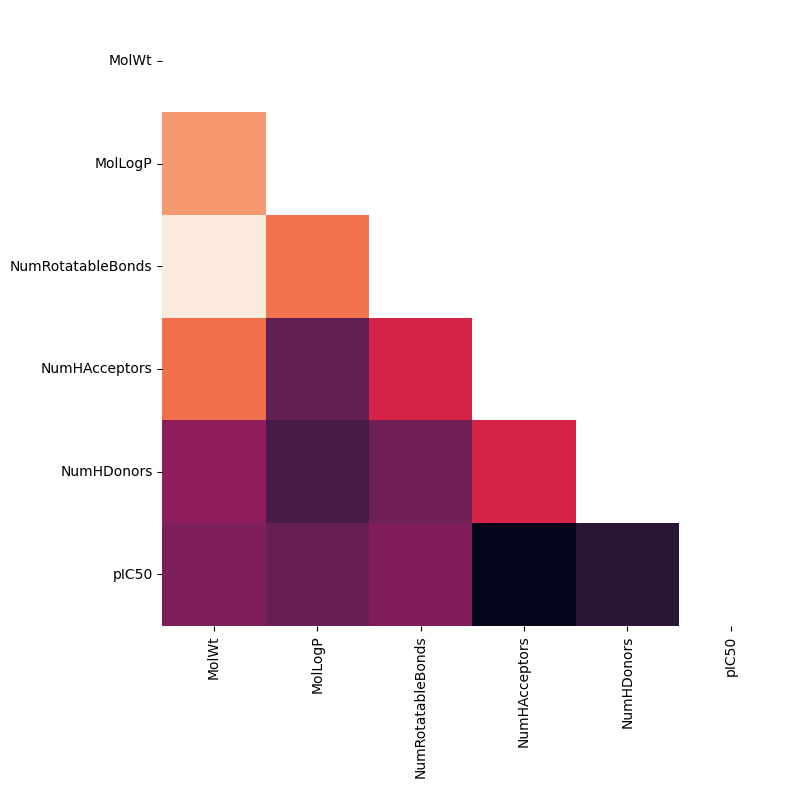

In [8]:
import numpy as np
num_tgt = chosen_descriptors.copy() 
num_tgt.append('pIC50')
fig = plt.figure(figsize=(8,8))
sns.heatmap(dfTrain[num_tgt].corr(method='pearson'),annot=True,fmt='.2f',mask=np.triu(dfTrain[num_tgt].corr(method='pearson')),cbar=False)

In [9]:
dfTrain[num_tgt].corr()
dfTrain[num_tgt].corr()['pIC50']

MolWt                0.257273
MolLogP              0.227922
NumRotatableBonds    0.259844
NumHAcceptors        0.069832
NumHDonors           0.138002
pIC50                1.000000
Name: pIC50, dtype: float64

In [10]:
# Getting all RDKit Descriptors and Saving it as a CSV File
allDescrsTrain = [Descriptors.CalcMolDescriptors(mol) for mol in smiles_listTrain]
allTrainDf = pd.DataFrame(allDescrsTrain)
allTrainDf.head()

MaxAbsEStateIndex  MaxEStateIndex  MinAbsEStateIndex  MinEStateIndex  \
0          13.051259       13.051259           0.000000       -0.228287   
1           9.015830        9.015830           0.148971        0.148971   
2          11.100234       11.100234           0.000000       -0.407532   
3          12.279179       12.279179           0.000000       -0.151115   
4          13.655531       13.655531           0.000000       -0.192342   

        qed        SPS    MolWt  HeavyAtomMolWt  ExactMolWt  \
0  0.453862  14.193548  500.257         478.081  498.054772   
1  0.566468  17.615385  354.458         328.250  354.216809   
2  0.535662  22.333333  492.479         462.239  491.112977   
3  0.518998  13.076923  372.896         347.696  372.160456   
4  0.501976  13.074074  390.886         366.694  390.151034   

   NumValenceElectrons  ...  fr_sulfide  fr_sulfonamd  fr_sulfone  \
0                  164  ...           0             0           0   
1                  138  ...           0             0           0   
2                  162  ...           0             0           0   
3                  138  ...           0             0           0   
4                  144  ...           0             0           0   

   fr_term_acetylene  fr_tetrazole  fr_thiazole  fr_thiocyan  fr_thiophene  \
0                  0             0            0            0             0   
1                  0             0            0            0             0   
2                  0             0            0            0             1   
3                  0             0            0            0             0   
4                  0             0            0            0             0   

   fr_unbrch_alkane  fr_urea  
0                 0        0  
1                 1        0  
2                 0        0  
3                 2        0  
4                 2        0  

[5 rows x 210 columns]

In [11]:
allTrainDf.to_csv('allTrainDescriptors.csv', index=False)

In [12]:
dfTrain['pIC50'].to_csv('trainTarget.csv', index = False)

In [14]:
lipinskiTrainDf = df3Train.drop('pIC50', axis = 1)
lipinskiTrainDf.to_csv('lipTrainDescriptors.csv', index=False)
df3Train['pIC50'].to_csv('lipTrainTarget.csv', index = False)

In [15]:
lipinskiTestDf = df3Test.drop('pIC50', axis = 1)
lipinskiTestDf.to_csv('lipTestDescriptors.csv', index=False)
df3Test['pIC50'].to_csv('lipTestTarget.csv', index = False)